In [21]:
# Re-importing necessary libraries and redefining the required objects since the code execution state was reset
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Since the state was reset, we need to reload the data and preprocess it again
file_path = 'Weather Training Data.csv'
weather_data = pd.read_csv(file_path)
# Assuming your DataFrame is named 'weather_data'
coastal_cities = ['Adelaide', 'Albany', 'Brisbane', 'Cairns', 'CoffsHarbour', 
                  'Darwin', 'GoldCoast', 'Hobart', 'Melbourne', 'MelbourneAirport',
                  'Newcastle', 'NorahHead', 'NorfolkIsland', 'Perth', 'PerthAirport',
                  'Portland', 'Sydney', 'SydneyAirport', 'Townsville', 'Williamtown', 'Wollongong']
weather_data = weather_data[weather_data['Location'].isin(coastal_cities)]
weather_data = weather_data.drop(columns=['row ID'])


# Handling missing values
numeric_columns = weather_data.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='mean')
weather_data[numeric_columns] = imputer_numeric.fit_transform(weather_data[numeric_columns])

categorical_columns = weather_data.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
weather_data[categorical_columns] = imputer_categorical.fit_transform(weather_data[categorical_columns])

# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    weather_data[column] = label_encoders[column].fit_transform(weather_data[column])

# Normalizing the data
scaler = StandardScaler()
weather_data[numeric_columns] = scaler.fit_transform(weather_data[numeric_columns])

# Splitting the dataset into features and target variable
X = weather_data.drop(columns=['RainTomorrow'])
y = weather_data['RainTomorrow'].astype('int')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Number of components chosen by PCA
n_components = pca.n_components_

# Retrain logistic regression on the transformed dataset
logreg_pca = LogisticRegression(solver='liblinear', random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_rep_pca = classification_report(y_test, y_pred_pca)

# n_components, accuracy_pca, classification_rep_pca

print(classification_rep_pca)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      9765
           1       0.70      0.45      0.55      3472

    accuracy                           0.81     13237
   macro avg       0.76      0.69      0.71     13237
weighted avg       0.79      0.81      0.79     13237



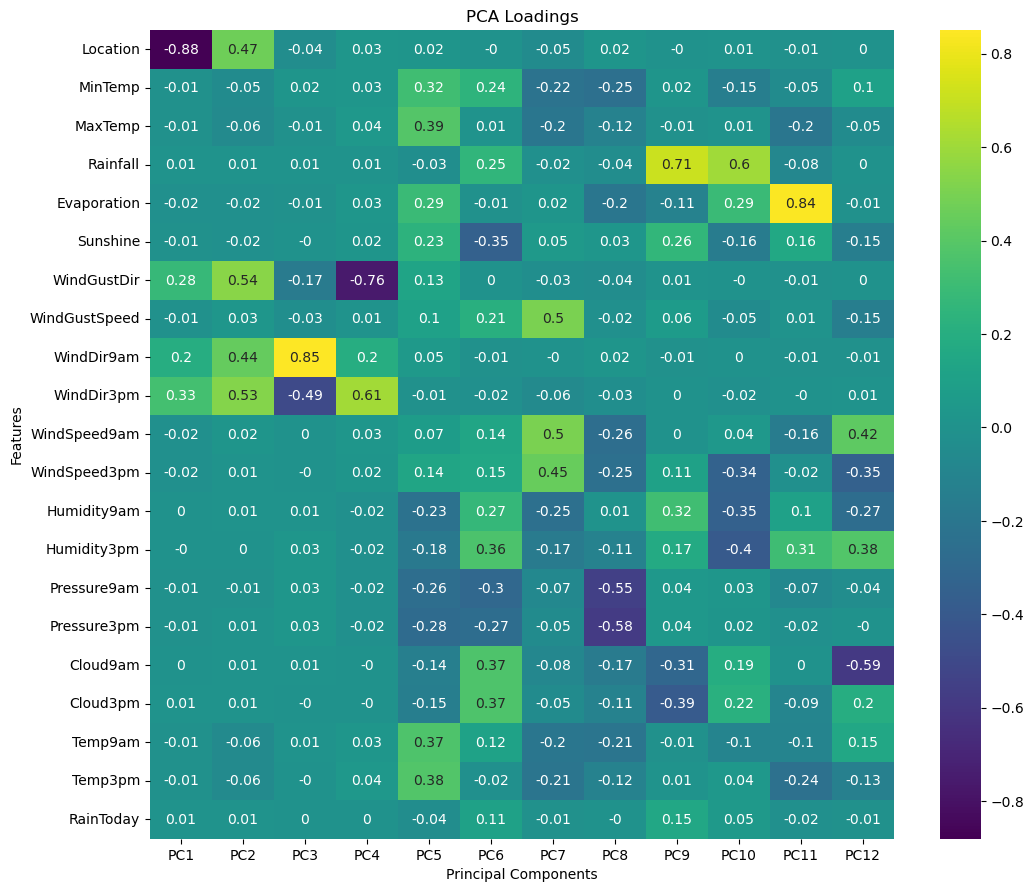

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'pca' is your fitted PCA object and 'X' is your original data
loadings = pca.components_
num_pc = pca.n_components_
pc_labels = ['PC'+str(i) for i in range(1, num_pc + 1)]
feature_labels = X.columns

# Create a DataFrame of loadings
df_loadings = pd.DataFrame(loadings.T, columns=pc_labels, index=feature_labels).round(2)

# Plotting the heatmap of loadings
plt.figure(figsize=(12, len(feature_labels)/2))
sns.heatmap(df_loadings, annot=True, cmap='viridis')
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


In [23]:
import pandas as pd
import numpy as np

# Assuming 'pca' is your fitted PCA object and 'X' is your original data
loadings = pca.components_
num_pc = pca.n_components_
feature_labels = X.columns

# Create a DataFrame of loadings
df_loadings = pd.DataFrame(loadings, columns=feature_labels)

# Identifying dominant features for each principal component
dominant_features = {}
for i in range(num_pc):
    pc = 'PC' + str(i + 1)
    # Sort the loadings by absolute value and get the feature with highest loading
    dominant_feature = df_loadings.iloc[i].abs().idxmax()
    dominant_features[pc] = dominant_feature

dominant_features


{'PC1': 'Location',
 'PC2': 'WindGustDir',
 'PC3': 'WindDir9am',
 'PC4': 'WindGustDir',
 'PC5': 'MaxTemp',
 'PC6': 'Cloud9am',
 'PC7': 'WindGustSpeed',
 'PC8': 'Pressure3pm',
 'PC9': 'Rainfall',
 'PC10': 'Rainfall',
 'PC11': 'Evaporation',
 'PC12': 'Cloud9am'}

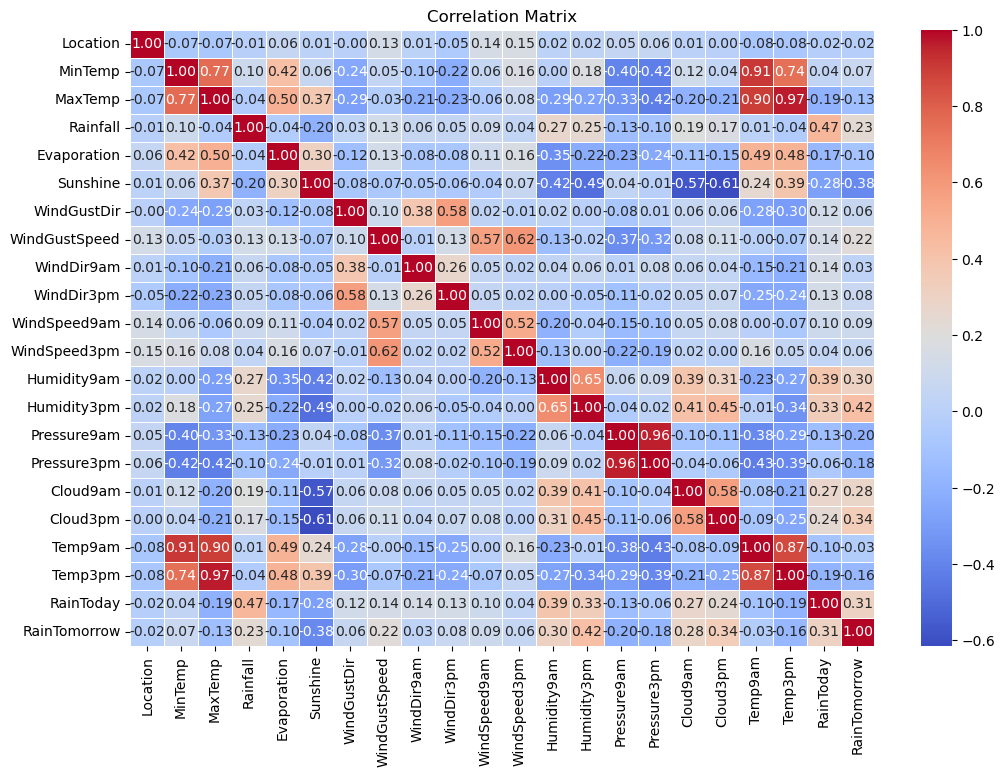

In [6]:
correlation_matrix = weather_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# PCA with Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
logreg_pca = RandomForestClassifier(**best_params,random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_rep_pca = classification_report(y_test, y_pred_pca)

# n_components, accuracy_pca, classification_rep_pca

print(classification_rep_pca)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      9765
           1       0.72      0.49      0.59      3472

    accuracy                           0.82     13237
   macro avg       0.78      0.71      0.73     13237
weighted avg       0.81      0.82      0.80     13237



In [50]:
# Model definition
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train_pca.shape[1], 128)  # Adjusted input size
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

In [67]:

# Assuming coastal_data is your preprocessed dataset
X = weather_data.drop(['RainTomorrow'], axis=1)
y = weather_data['RainTomorrow']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=20)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test_pca.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = NeuralNet()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()  # Adjusting the output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        y_pred.extend(outputs.numpy())  # Collect raw outputs

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
y_pred = np.array(y_pred)
y_pred_binary = (y_pred > 0.5).astype(int)

# Ensure y_test is a binary array
y_test_binary = y_test.values.astype(int)  # Assuming y_test is a pandas Series

# Compute classification report
classification_rep = classification_report(y_test_binary, y_pred_binary)

# Print the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9765
           1       0.77      0.48      0.59      3472

    accuracy                           0.83     13237
   macro avg       0.80      0.71      0.74     13237
weighted avg       0.82      0.83      0.81     13237



In [71]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sydney_data = weather_data[weather_data['Location'] == 16]

# Assuming coastal_data is your preprocessed dataset
X = sydney_data.drop(['RainTomorrow', 'Location'], axis=1)  # Also drop 'Location' column
y = sydney_data['RainTomorrow']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test_pca.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = NeuralNet()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        y_pred.extend(outputs.numpy())

# Convert predictions to binary (0 or 1) based on a 0.5 threshold
y_pred = np.array(y_pred)
y_pred_binary = (y_pred > 0.5).astype(int)

# Ensure y_test is a binary array
y_test_binary = y_test.values.astype(int)

# Compute classification report
classification_rep = classification_report(y_test_binary, y_pred_binary)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       533
           1       0.69      0.62      0.65       176

    accuracy                           0.83       709
   macro avg       0.78      0.76      0.77       709
weighted avg       0.83      0.83      0.83       709



In [66]:
loadings = pca.components_
num_pc = pca.n_components_
feature_labels = X.columns

# Create a DataFrame of loadings
df_loadings = pd.DataFrame(loadings, columns=feature_labels)

# Identifying dominant features for each principal component
dominant_features = {}
for i in range(num_pc):
    pc = 'PC' + str(i + 1)
    # Sort the loadings by absolute value and get the feature with highest loading
    dominant_feature = df_loadings.iloc[i].abs().idxmax()
    dominant_features[pc] = dominant_feature

dominant_features

{'PC1': 'Temp9am',
 'PC2': 'Humidity3pm',
 'PC3': 'WindGustSpeed',
 'PC4': 'WindSpeed3pm',
 'PC5': 'Rainfall',
 'PC6': 'WindGustDir',
 'PC7': 'WindDir9am',
 'PC8': 'WindSpeed3pm',
 'PC9': 'WindGustDir',
 'PC10': 'WindSpeed9am'}

In [68]:
sydney_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
20640,16,0.858696,-0.233187,1.162715,0.347612,-2.365936,8,0.000000,8,11,...,1.513603,1.565374,0.051080,0.367035,1.433490,1.530527,0.304809,-0.233020,1,1.700446
20641,16,0.858696,0.302698,0.270978,-0.629460,-1.510086,8,0.000000,13,0,...,0.946947,0.939905,0.095614,0.218576,1.017393,1.092828,0.598190,0.442559,1,1.700446
20642,16,0.983461,-0.166202,1.459961,-1.048206,-2.365936,8,0.000000,5,0,...,0.946947,1.906538,-0.453646,-0.464337,1.433490,1.530527,0.425613,-0.233020,1,1.700446
20643,16,0.894343,0.319445,6.903274,0.000000,-2.365936,8,0.000000,5,13,...,1.261756,0.996765,-1.329493,-1.503552,1.433490,1.530527,0.615448,0.563816,1,1.700446
20644,16,0.983461,0.570641,-0.137735,-0.908624,0.360104,8,0.000000,13,1,...,0.065482,0.314436,-2.160806,-2.423999,0.601295,0.655128,0.839798,0.650429,1,1.700446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,16,-0.264184,-0.785819,-0.286358,-1.466951,-2.302539,11,-1.179817,14,11,...,0.821023,0.598740,1.045686,1.020256,1.017393,1.092828,-0.747913,-0.839309,0,1.700446
22997,16,-0.620654,-0.919791,-0.249202,-1.048206,-1.763671,11,-0.332868,13,8,...,0.695100,0.712461,1.951223,2.000087,0.601295,1.092828,-1.075810,-0.873954,0,1.700446
22998,16,-0.959300,-0.769073,-0.286358,-1.117997,0.550292,13,-0.871835,13,2,...,0.632138,-0.197312,1.669170,1.435942,-1.063097,-1.095672,-1.369191,-0.614116,0,-0.588081
22999,16,-0.941477,-1.020269,-0.286358,-0.978415,-1.510086,13,-1.333808,14,3,...,1.072871,-0.026729,0.526115,0.010733,0.601295,0.655128,-1.507253,-0.856632,0,-0.588081
